# ATP Tennis Data - Player Diff Stats + One Hot Encoding (All Categorical Data)


In our previous notebooks, we saw that Gradient Bosst gave us the best results when we do not encode our categorical data. The raw data did better than when we diff'd player stats.

In this notebook, we will run the same models but we will one hot encode all categorical data using the raw data set

### Results from the best model so far:

```
Model Score: 0.6826468602295747

ROC/AUC Score: 0.682614201415636
              precision    recall  f1-score   support

        Loss       0.68      0.67      0.68      7381
         Win       0.68      0.69      0.69      7429

    accuracy                           0.68     14810
   macro avg       0.68      0.68      0.68     14810
weighted avg       0.68      0.68      0.68     14810
```

# Summary of Results

* Grandient Boosting still gave us the best accuracy out of all models (see results below)
* One hot encoding our features did not affect our model accuracy much with Grandient Boost. We are back to around the same accuracy score as before (but slightly higher).
* All models but AdaBoost and Grandient Boost did give us accuracy performance which suggests that when we do not one hot encode our category features, the model may have been deriving the wrong information when treating those categories as normal features

```
Model Score: 0.6833220796758946

ROC/AUC Score: 0.6833051847604916
              precision    recall  f1-score   support

        Loss       0.68      0.68      0.68      7381
         Win       0.68      0.69      0.69      7429

    accuracy                           0.68     14810
   macro avg       0.68      0.68      0.68     14810
weighted avg       0.68      0.68      0.68     14810
```



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from datetime import datetime
import pickle
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import jupyter_util as ju
from util.model_util import ModelWrapper, REPORT_FILE, RSTATE, N_JOBS, MAX_ITER, LABEL_COL

%matplotlib inline
sns.set()


# date
DATE_FORMAT = '%Y-%m-%d %H:%m'
DATE = datetime.now().strftime(DATE_FORMAT)

DESCRIPTION = "ohe"


# update this
FEATURE_FILE = f'../datasets/atp_matches_1985-2019_features-ohe.csv'

START_YEAR = 1998
END_YEAR = 2018




In [2]:
X_train, X_test, y_train, y_test = ju.get_data(FEATURE_FILE, LABEL_COL, START_YEAR, END_YEAR)

In [3]:
X_test.columns

Index(['draw_size', 'round_label', 'tourney_level_label', 'tourney_month',
       'tourney_year', 'p1_age', 'p1_ht', 'p1_rank', 'p1_seed', 'p2_age',
       ...
       'p2_200624', 'p2_200630', 'p2_202090', 'p2_202130', 'p2_202358',
       'p2_202359', 'p2_202385', 'p2_205734', 'best_of_3', 'best_of_5'],
      dtype='object', length=5257)

# Logistic Regression

In [4]:

# train our model

lr = ModelWrapper(LogisticRegression(n_jobs = N_JOBS, verbose = 1, random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_lr = lr.predict()

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

Model Score: 0.6615800135043889

ROC/AUC Score: 0.661578647004313
              precision    recall  f1-score   support

        Loss       0.66      0.66      0.66      7381
         Win       0.66      0.66      0.66      7429

    accuracy                           0.66     14810
   macro avg       0.66      0.66      0.66     14810
weighted avg       0.66      0.66      0.66     14810

      Loss   Win
Loss  4880  2501
Win   2511  4918


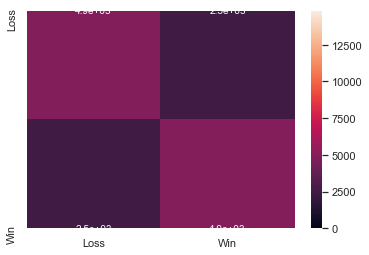

In [5]:
lr.analyze()

In [6]:
# ju.plot_2d(X_test, y_predict_lr)

In [7]:
lr.save()

Saving report: ../reports/summary.csv


# KNN

In [8]:

# train our model

knn = ModelWrapper(KNeighborsClassifier(n_jobs = N_JOBS),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_knn = knn.predict()

Model Score: 0.6106684672518569

ROC/AUC Score: 0.6106788212428513
              precision    recall  f1-score   support

        Loss       0.61      0.61      0.61      7381
         Win       0.61      0.61      0.61      7429

    accuracy                           0.61     14810
   macro avg       0.61      0.61      0.61     14810
weighted avg       0.61      0.61      0.61     14810

      Loss   Win
Loss  4531  2850
Win   2916  4513


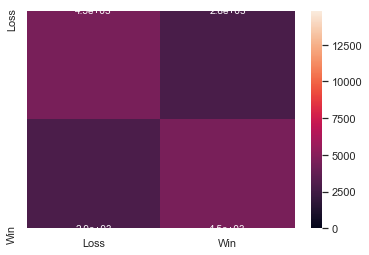

In [9]:
knn.analyze()

In [10]:
# ju.plot_2d(X_test, y_predict_knn)

In [11]:
knn.save()

Saving report: ../reports/summary.csv


# Decision Tree

In [12]:

# train our model

dt = ModelWrapper(DecisionTreeClassifier(random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_dt = dt.predict()

Model Score: 0.6054692775151924

ROC/AUC Score: 0.6054605374175899
              precision    recall  f1-score   support

        Loss       0.60      0.60      0.60      7381
         Win       0.61      0.61      0.61      7429

    accuracy                           0.61     14810
   macro avg       0.61      0.61      0.61     14810
weighted avg       0.61      0.61      0.61     14810

      Loss   Win
Loss  4449  2932
Win   2911  4518


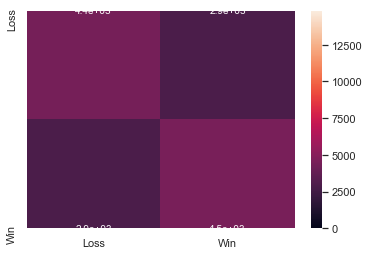

In [13]:
dt.analyze()

In [14]:
# ju.plot_2d(X_test, y_predict_dt)

In [15]:
dt.save()

Saving report: ../reports/summary.csv


# Random Forest Classifier

In [16]:

# train our model

rf = ModelWrapper(RandomForestClassifier(random_state=RSTATE, verbose=1),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_rf = rf.predict()

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


Model Score: 0.6442943956785956

ROC/AUC Score: 0.6444928714952801
              precision    recall  f1-score   support

        Loss       0.63      0.71      0.66      7381
         Win       0.67      0.58      0.62      7429

    accuracy                           0.64     14810
   macro avg       0.65      0.64      0.64     14810
weighted avg       0.65      0.64      0.64     14810

      Loss   Win
Loss  5209  2172
Win   3096  4333


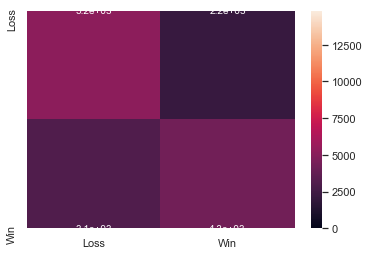

In [17]:
rf.analyze()

In [18]:
# ju.plot_2d(X_test, y_predict_rf)

In [19]:
rf.save()

Saving report: ../reports/summary.csv


# Gradient Boosting

In [20]:

# train our model

gb = ModelWrapper(GradientBoostingClassifier(random_state=RSTATE, verbose=1, n_iter_no_change = 4),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_gb = gb.predict()

      Iter       Train Loss   Remaining Time 
         1           1.3670           13.06m
         2           1.3505           12.81m
         3           1.3357           12.63m
         4           1.3238           13.55m
         5           1.3131           14.19m
         6           1.3044           13.67m
         7           1.2958           13.31m
         8           1.2890           12.92m
         9           1.2825           12.52m
        10           1.2771           12.20m
        20           1.2394           10.06m
        30           1.2085            9.09m
        40           1.1864            7.61m
        50           1.1731            6.40m
        60           1.1666            5.01m
        70           1.1621            3.63m
        80           1.1591            2.36m
        90           1.1566            1.16m
       100           1.1545            0.00s


Model Score: 0.6833220796758946

ROC/AUC Score: 0.6833051847604916
              precision    recall  f1-score   support

        Loss       0.68      0.68      0.68      7381
         Win       0.68      0.69      0.69      7429

    accuracy                           0.68     14810
   macro avg       0.68      0.68      0.68     14810
weighted avg       0.68      0.68      0.68     14810

      Loss   Win
Loss  5005  2376
Win   2314  5115


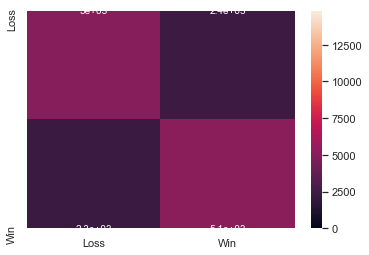

In [21]:
gb.analyze()

In [22]:
# ju.plot_2d(X_test, y_predict_gb)

In [23]:
gb.save()

Saving report: ../reports/summary.csv


# AdaBoost

In [24]:
ab = ModelWrapper(AdaBoostClassifier(random_state=RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_ab = ab.predict()

Model Score: 0.6650911546252533

ROC/AUC Score: 0.6650486822377341
              precision    recall  f1-score   support

        Loss       0.67      0.65      0.66      7381
         Win       0.66      0.68      0.67      7429

    accuracy                           0.67     14810
   macro avg       0.67      0.67      0.67     14810
weighted avg       0.67      0.67      0.67     14810

      Loss   Win
Loss  4812  2569
Win   2391  5038


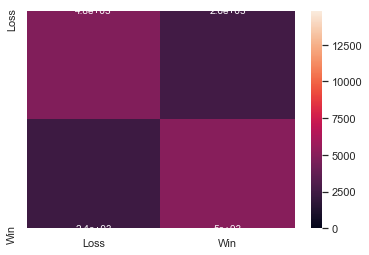

In [25]:
ab.analyze()

In [26]:
# ju.plot_2d(X_test, y_predict_ab)

In [27]:
ab.save()

Saving report: ../reports/summary.csv


# Results

* Gradient Boosting is still giving us the best accuracy
* Accuracy improved slightly for all models except for AdaBoost and Grandient Boosting

In [28]:
report = pd.read_csv(REPORT_FILE)
report.tail(5)

,model_name,description,data_file,start_year,end_year,accuracy,roc_auc_score,confusion_matrix,classification_report,model_file,predict_time_min,fit_time_min,total_time_min
13,KNeighborsClassifier,ohe,../datasets/atp_matches_1985-2019_features-ohe...,1998,2018,0.610668,0.610679,"{""0"": {""0"": 4531, ""1"": 2916}, ""1"": {""0"": 2850,...","{""Loss"": {""precision"": 0.608432926010474, ""rec...",../models/kneighborsclassifier-1998-2018-ohe.pkl,0.0,0.0,0.0
14,DecisionTreeClassifier,ohe,../datasets/atp_matches_1985-2019_features-ohe...,1998,2018,0.605469,0.605461,"{""0"": {""0"": 4449, ""1"": 2911}, ""1"": {""0"": 2932,...","{""Loss"": {""precision"": 0.6044836956521739, ""re...",../models/decisiontreeclassifier-1998-2018-ohe...,0.0,0.0,0.0
15,RandomForestClassifier,ohe,../datasets/atp_matches_1985-2019_features-ohe...,1998,2018,0.644294,0.644493,"{""0"": {""0"": 5209, ""1"": 3096}, ""1"": {""0"": 2172,...","{""Loss"": {""precision"": 0.627212522576761, ""rec...",../models/randomforestclassifier-1998-2018-ohe...,0.0,0.0,0.0
16,GradientBoostingClassifier,ohe,../datasets/atp_matches_1985-2019_features-ohe...,1998,2018,0.683322,0.683305,"{""0"": {""0"": 5005, ""1"": 2314}, ""1"": {""0"": 2376,...","{""Loss"": {""precision"": 0.6838365896980462, ""re...",../models/gradientboostingclassifier-1998-2018...,0.0,11.0,11.0
17,AdaBoostClassifier,ohe,../datasets/atp_matches_1985-2019_features-ohe...,1998,2018,0.665091,0.665049,"{""0"": {""0"": 4812, ""1"": 2391}, ""1"": {""0"": 2569,...","{""Loss"": {""precision"": 0.668054977092878, ""rec...",../models/adaboostclassifier-1998-2018-ohe.pkl,0.0,1.0,1.0


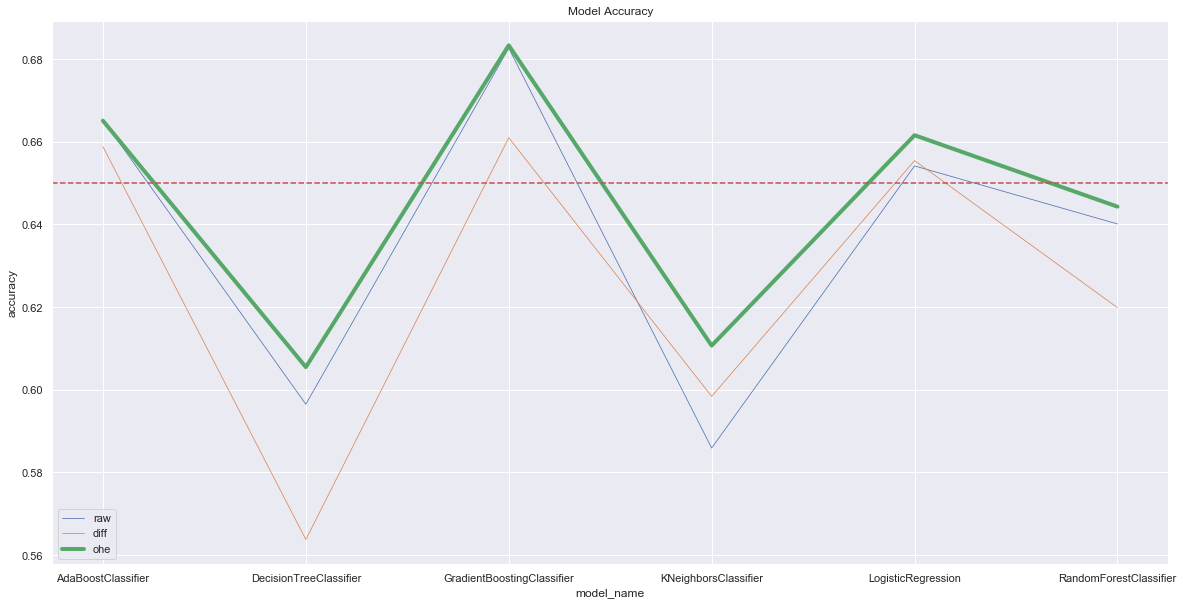

In [29]:
f, a = plt.subplots(1, 1, figsize=(20, 10))

descs = report.description.unique()

for desc in descs:
    report_desc = report[report.description == desc]
    if desc == DESCRIPTION:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=4)
    else:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=0.75)

a.axhline(0.65, ls='--', color='r')
a.set_title(f"Model Accuracy")
_ = a.legend(loc="lower left")

In [33]:
current_report = report[(report.model_name == 'GradientBoostingClassifier') &
                                  (report.description == DESCRIPTION)]
mw = ModelWrapper.get_model_wrapper_from_report(current_report)


In [34]:
import shap

shap.initjs()

explainer = shap.TreeExplainer(mw.model, data=X_train.values)
shap_values = explainer.shap_values(X_test.values)

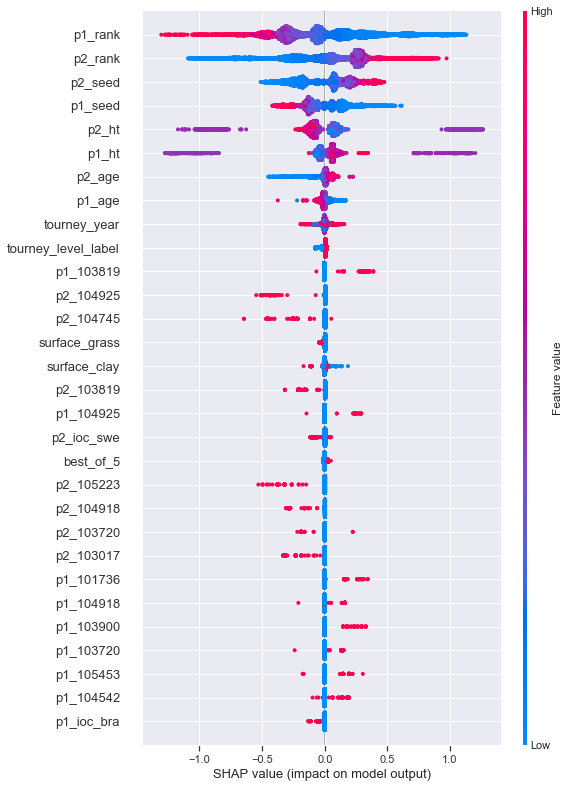

In [37]:
shap.summary_plot(shap_values, X_test, max_display=30)

In [40]:
print(f'Last Finished: {datetime.now().strftime("%y-%m-%d %H:%M")}')

Last Finished: 19-10-20 22:23
